In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.models import Sequential

Using Theano backend.


In [3]:
from keras.layers import Dense, Dropout, Activation, Flatten

In [4]:
from keras.layers import Convolution2D, MaxPooling2D

In [5]:
from keras.utils import np_utils

In [6]:
data_small = np.load("TrainingSetsmall.npy")
data = np.load("TrainingSet.npy")

In [7]:
len(data_small)

12000

In [8]:
len(data)

120000

In [9]:
data_small[0]

array([ array([-9.25448038-15.18775989j, -2.24205489 -0.10753784j,
       -0.78882372 +1.36690785j, -0.89035393 +1.06066341j,
        0.85004528 +0.4339224j , -8.66643237 -7.70934722j,
        3.20501255 +1.78734733j,  0.58594616 -0.32365282j,
        0.21286821 +0.69824414j, -1.02034206 +1.41294532j,
       -4.83413204 -4.38749276j, -0.26543746 -1.2238356j ,
       -2.60576050 +0.91744195j,  0.22359269 +0.51810931j,
       -0.31021184 +1.67326033j,  8.38900837 +1.48257171j]),
       0, 272.832, 99.3888], dtype=object)

In [61]:
X_small = data_small[:,:2]
X_large = data[:,:2]
len(X_large)

120000

In [56]:
Y_temp = data_small[:,2:]
YL_temp = data[:,2:]
YL_temp[0]

array([213.45029999999997, 69.82919999999999], dtype=object)

In [63]:
Y_small = Y_temp[:,1] / Y_temp[:,0]
Y_large = YL_temp[:,1] / YL_temp[:,0]
Y_small = Y_small.reshape(len(Y_small), 1)
Y_large = Y_large.reshape(len(Y_large), 1)
print(Y_large[:10])
Y_small1 = Y_small[:,0]
Y_large1 = Y_large[:,0]
print(Y_large1[:10])

[[0.3271450075263422]
 [0.5392206054524168]
 [0.5925740090316106]
 [0.4631209232313096]
 [0.2752321054207847]
 [0.7532195268044325]
 [0.3474094040131776]
 [0.4306678646301288]
 [0.17600574712643682]
 [0.49688697318007663]]
[0.3271450075263422 0.5392206054524168 0.5925740090316106
 0.4631209232313096 0.2752321054207847 0.7532195268044325
 0.3474094040131776 0.4306678646301288 0.17600574712643682
 0.49688697318007663]


In [58]:
X_flat = np.array([list(np.real(M)) + list(np.imag(M)) + [r] for M, r in zip(X_small[:,0], X_small[:,1])])
XL_flat = np.array([list(np.real(M)) + list(np.imag(M)) + [r] for M, r in zip(X_large[:,0], X_large[:,1])])

In [59]:
XL_flat[:10]

array([[  4.08616455e-01,   2.94582301e-01,   3.49457320e-01,
         -2.23264998e+00,  -1.32004614e+00,   4.31566818e+00,
         -1.78115024e+00,  -5.81656694e-01,  -1.05346108e+00,
         -6.14533556e-01,   5.41888520e-01,   2.94669310e-01,
          7.75541979e-01,   4.48055063e-01,  -4.14287549e-01,
          2.28993866e+00,   4.24534600e+00,  -1.73573561e+00,
         -1.03655202e+00,  -2.12467291e+00,  -1.29554226e+00,
         -2.96537386e+00,  -1.38744606e+00,  -8.65780015e-01,
         -9.92684044e-01,   3.34173964e-01,  -3.86261262e+00,
         -1.68916516e+00,   1.82528635e+00,  -5.82286335e-01,
         -1.73279165e+00,  -1.95110410e+00,   0.00000000e+00],
       [  4.08616455e-01,   2.94582301e-01,   3.49457320e-01,
         -2.23264998e+00,  -1.32004614e+00,   4.31566818e+00,
         -1.78115024e+00,  -5.81656694e-01,  -1.05346108e+00,
         -6.14533556e-01,   5.41888520e-01,   2.94669310e-01,
          7.75541979e-01,   4.48055063e-01,  -4.14287549e-01,
       

In [64]:
X_train = X_flat[:9000]
X_test = X_flat[9000:]
Y_train = Y_small[:9000]
Y_test = Y_small[9000:]
Y_train1 = Y_small1[:9000]
Y_test = Y_small1[9000:]

XL_train = XL_flat[:90000]
XL_test = XL_flat[90000:]
YL_train = Y_large[:90000]
YL_test = Y_large[90000:]
YL_train1 = Y_large1[:90000]
YL_test = Y_large1[90000:]

print(len(XL_train), len(YL_train))
print(len(XL_test), len(YL_test))

90000 90000
30000 30000


In [16]:
Y_train1[:10]

array([0.3642857142857143, 0.3568452380952381, 0.32767857142857143,
       0.45892857142857146, 0.5991197856869499, 0.49043245311902023,
       0.3224263298890165, 0.5007654037504784, 0.34953009398120377,
       0.4807038592281544], dtype=object)

In [34]:
def rel_error(y_true, y_pred):
    error = abs(y_true - y_pred)
    return error

In [65]:
model = Sequential()
height = 64
layers = 16

model.add(Dense(height, input_dim=33, activation='relu'))
model.add(Dropout(0.25))
for i in range(layers-1):
    model.add(Dense(height, activation='relu'))
    model.add(Dropout(0.25))
model.add(Dense(1, activation='relu'))

In [66]:
model.compile(loss='mean_squared_error',
             optimizer='sgd',
             metrics=[rel_error])

In [67]:
h = model.fit(XL_train, YL_train, batch_size=20, epochs=30, verbose=1, validation_split=0.2)
s = model.evaluate(XL_test, YL_test, batch_size=20)

Train on 72000 samples, validate on 18000 samples
Epoch 1/30
72000/72000 [==============================] - 11s - loss: 0.0167 - rel_error: 0.1022 - val_loss: 0.0137 - val_rel_error: 0.0948

KeyboardInterrupt: 

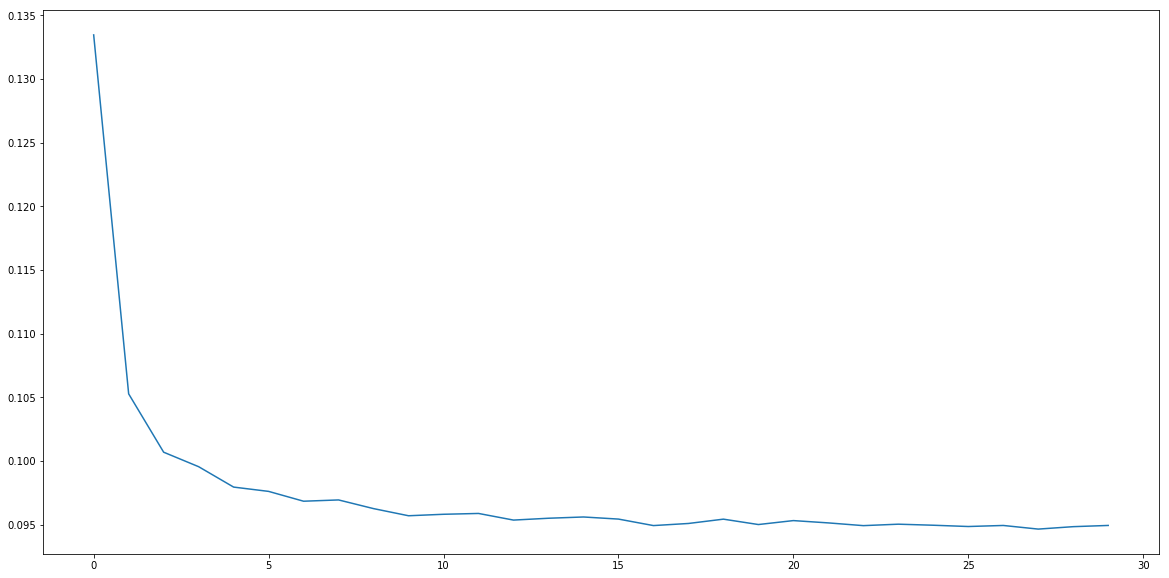

[0.012981210546568036, 0.090550802772243824]


In [52]:
# h1: Incremental learning (L2, sgd(default), 12(relu)-> 8(relu)-> 1(sigmoid), batch size=1, epochs=10)
# h2: (L2, sgd(default), 12(relu)-> 8(relu)-> 1(sigmoid), batch size=20, epochs=10)
loss = h.history['rel_error']
domain = np.arange(30)
plt.figure(figsize=(20,10))
plt.plot(domain, loss)
plt.show()
print(s)

In [ ]:
# T1: (L2, sgd(default), 12(relu)-> 8(relu)-> 1(sigmoid), batch size=20, epochs=30)
# T2: (L1, sgd(default), 12(relu)-> 8(relu)-> 1(sigmoid), batch size=20, epochs=30)
# T3: (L2, sgd(default), 12(sigmoid)-> 8(sigmoid)-> 1(sigmoid), batch size=20, epochs=30)
# T4: (L2, sgd(default), 12(linear)-> 8(sigmoid)-> 1(sigmoid), batch size=20, epochs=30)
# T5: (L2, sgd(default), 12(relu)-> dropout(0.5)-> 8(relu)-> dropout(0.5)-> 1(sigmoid), batch size=20, epochs=30)
# T6: (L2, sgd(default), 12(relu)-> dropout(0.5)-> 8(relu)-> dropout(0.5)-> 1(relu), batch size=20, epochs=30)

ls1 = T1.history['loss']
ls2 = T2.history['loss']
ls3 = T3.history['loss']
ls4 = T4.history['loss']
ls5 = T5.history['loss']
ls6 = T6.history['loss']
e30 = np.arange(30)
plt.figure(figsize=(20,10))
plt.loglog(e30, ls1)
plt.plot(e30, ls2)
plt.plot(e30, ls3)
plt.plot(e30, ls4)
plt.plot(e30, ls5)
plt.plot(e30, ls6)
plt.show()
print('S1:', S1)
print('S2:', S2)
print('S3:', S3)
print('S4:', S4)
print('S5:', S5)
print('S6:', S6)

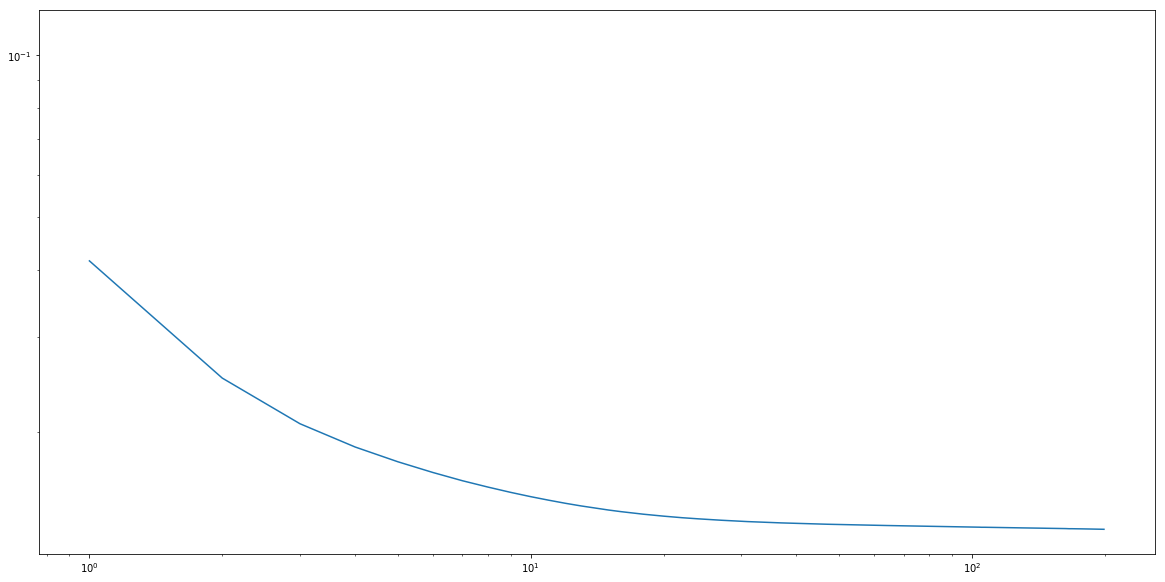

0.0129158501622


In [120]:
# h3: (L2, sgd(default), 12(relu)-> 8(relu)-> 1(sigmoid), batch size=20, epochs=200)
loss3 = h3.history['loss']
e200 = np.arange(200)
plt.figure(figsize=(20,10))
plt.loglog(e200, loss3)
plt.show()
print(s3)

In [116]:
model.evaluate(X_test, Y_test)

  32/3000 [..............................] - ETA: 0s

0.012909997177620728